# Use OpenCV to calibrate camera intrinsic parameters
Use checkboard to calibrate. Frames are saved in `intrinsic_calib_frames/[0-8]` folder. Cameras labeled by number 0-8, always start from `0`.

In [1]:
ls  intrinsic_calib_frames/

0/  1/  2/  3/  4/  5/  6/  7/  8/


Import packages. The `numpy` and `opencv` must have been installed.

In [2]:
import json
from intrinsic_utils import calibration, calibrate_nview

## CheckboardSize
Set the checkboard corners

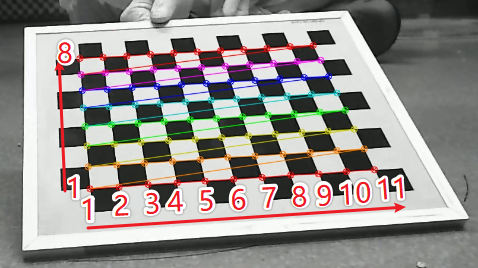

In [3]:
board_size = (11,8)  # checkerboard size

## Calibrate one camera view

In [4]:
K, dist, image_HW = calibration('intrinsic_calib_frames/0', board_size)

相机内参矩阵：
 [[1141    0  633]
 [   0 1141  436]
 [   0    0    1]]
相机失真参数：
 [ 0.03  -0.045  0.     0.     0.   ]
重新投影误差:  0.055651288895391865


# Calibrate all `[0-8]` camera views. And export to json


In [6]:
calibrate_nview('intrinsic_calib_frames/', board_size)

相机内参矩阵：
 [[1141    0  633]
 [   0 1141  436]
 [   0    0    1]]
相机失真参数：
 [ 0.03  -0.045  0.     0.     0.   ]
重新投影误差:  0.055651288895391865
相机内参矩阵：
 [[1371    0  614]
 [   0 1371  398]
 [   0    0    1]]
相机失真参数：
 [-0.476  0.329  0.     0.     0.   ]
重新投影误差:  0.0986553919194887
相机内参矩阵：
 [[1146    0  629]
 [   0 1138  401]
 [   0    0    1]]
相机失真参数：
 [ 0.072 -0.18   0.     0.     0.   ]
重新投影误差:  0.053259400869603755
相机内参矩阵：
 [[1357    0  654]
 [   0 1359  398]
 [   0    0    1]]
相机失真参数：
 [-0.446  0.239  0.     0.     0.   ]
重新投影误差:  0.05897618030162346
相机内参矩阵：
 [[1145    0  644]
 [   0 1143  443]
 [   0    0    1]]
相机失真参数：
 [0.011 0.028 0.    0.    0.   ]
重新投影误差:  0.03500934924201203
相机内参矩阵：
 [[1141    0  633]
 [   0 1141  410]
 [   0    0    1]]
相机失真参数：
 [ 0.046 -0.082  0.     0.     0.   ]
重新投影误差:  0.034730146086225364
相机内参矩阵：
 [[1362    0  679]
 [   0 1360  390]
 [   0    0    1]]
相机失真参数：
 [-0.459  0.277  0.     0.     0.   ]
重新投影误差:  0.11754050326781533
相机内参矩阵：
 [[1147    0  645]
 [ 

## The Intrinsic result is saved.
The Intrinsic result is savedinto `intrinsic_calib_frames/intrinsics_calib.json`

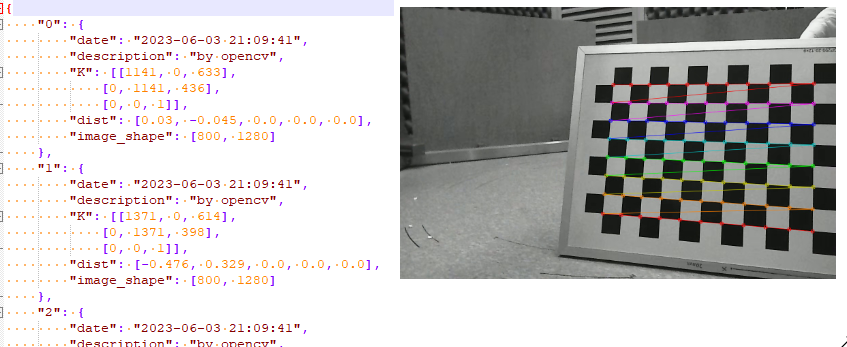

In [11]:
intrinsics_data = json.load(open('intrinsic_calib_frames/intrinsics_calib.json'))
print(intrinsics_data.keys())
intrinsics_data['0']

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8'])


{'date': '2023-06-03 21:09:41',
 'description': 'by opencv',
 'K': [[1141, 0, 633], [0, 1141, 436], [0, 0, 1]],
 'dist': [0.03, -0.045, 0.0, 0.0, 0.0],
 'image_shape': [800, 1280]}

## Watch out
The default `dist` calibrate ignore the `tangential` and the `K3` distortion, which may suitable because modern camera is great enough, just a slight distortion. That's what MATLAB behave.

However, when you have `extreme` camerea distortion. Try to set the full distortion calibrating as below.
```python
#intrinsic_utils.py calibration()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], 
                                                    None, None)
```
